In [1]:
from math import ceil
import pystare as ps

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.tri as tri
import cartopy.crs as ccrs

import numpy as np

In [2]:
def shiftarg_lon(lon):
    "If lon is outside +/-180, then correct back."
    if(lon>180):
        return ((lon + 180.0) % 360.0)-180.0
    else:
        return lon

def triangulate1(lats,lons):
    "Prepare data for tri.Triangulate."
    print('triangulating1...')
    intmat=[]
    npts=int(len(lats)/3)
    k=0
    for i in range(npts):
        intmat.append([k,k+1,k+2])
        k=k+3
    for i in range(len(lons)):
        lons[i] = shiftarg_lon(lons[i])
    print('triangulating1 done.')      
    return lons,lats,intmat

def plot1(lon,lat,lons,lats,triang,c0='r',c1='b',transf=None,lw=1):
    # if(lon is not None):
    if True:
        x=np.zeros([lon.size+1],dtype=np.double);x[:-1]=lon[:];x[-1]=lon[0]
        y=np.zeros([lat.size+1],dtype=np.double); y[:-1]=lat[:]; y[-1]=lat[0]
        ax.plot(x,y,True,transform=transf,c=c0)
    plt.triplot(triang,c1+'-',transform=transf,lw=lw,markersize=3)
    # plt.scatter(lons,lats,s=10,c=c1,transform=ccrs.PlateCarree())
    return

def make_hull(lat0,lon0,resolution0):
    hull0 = ps.to_hull_range_from_latlon(lat0,lon0,resolution0)
    print('hull0 len: ',len(hull0),type(hull0))
    lath0,lonh0,lathc0,lonhc0 = ps.to_vertices_latlon(hull0)
    lons0,lats0,intmat0 = ps.triangulate(lath0,lonh0)
    print('lons0  len: ',len(lons0))
    print('intmat len: ',len(intmat0),type(intmat0))
    triang0 = tri.Triangulation(lons0,lats0,intmat0)
    for i in range(len(intmat0)):
        print(i,intmat0[i],lons0[intmat0[i]],lats0[intmat0[i]])
    print('triang ',triang0.triangles.shape)
    # exit()
    return lats0,lons0,triang0,hull0

hull0 len:  10 <class 'numpy.ndarray'>
lons0  len:  30
intmat len:  10 <class 'list'>
0 [0, 1, 2] [15.35858327 21.90167434 30.20648377] [ 4.85020585 -5.46142928  2.5084551 ]
1 [3, 4, 5] [-14.63880654  -8.97828322   0.415556  ] [ 8.42105871 -1.3114612   6.86746932]
2 [6, 7, 8] [15.35858327  0.415556    6.11345602] [ 4.85020585  6.86746932 -3.1316658 ]
3 [9, 10, 11] [ 6.11345602  0.415556   -8.97828322] [-3.1316658   6.86746932 -1.3114612 ]
4 [12, 13, 14] [15.35858327  6.11345602 21.90167434] [ 4.85020585 -3.1316658  -5.46142928]
5 [15, 16, 17] [-14.63880654   0.415556    -8.02332385] [ 8.42105871  6.86746932 22.0035996 ]
6 [18, 19, 20] [15.35858327  8.4459729   0.415556  ] [ 4.85020585 20.22249681  6.86746932]
7 [21, 22, 23] [ 8.4459729  -8.02332385  0.415556  ] [20.22249681 22.0035996   6.86746932]
8 [24, 25, 26] [15.35858327 30.20648377 26.56505138] [ 4.85020585  2.5084551  17.54840083]
9 [27, 28, 29] [15.35858327 26.56505138  8.4459729 ] [ 4.85020585 17.54840083 20.22249681]
triang  

<ipython-input-3-bb1f750dd606>:24: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes(projection=proj,transform=transf)


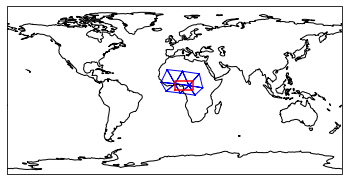

In [3]:
# resolution = 5
# resolution = 4
resolution = 3

resolution0 = resolution;

# lat0 = np.array([ 10, 5, 60,70], dtype=np.double)
# lon0 = np.array([-30,-20,60,10], dtype=np.double)

lat0 = np.array([0, 0,10,10], dtype=np.double)
lon0 = np.array([0,20,20,0], dtype=np.double)

lats0,lons0,triang0,hull0 = make_hull(lat0,lon0,resolution0)
print('hull0: ',len(hull0))

# Set up the projection and transformation
proj = ccrs.PlateCarree()
# proj = ccrs.Robinson() # Drives spurious IllegalArgumentException: Argument must be Polygonal or LinearRing
# proj   = ccrs.Mollweide() # Drives spurious IllegalArgumentException: Argument must be Polygonal or LinearRing
# transf = ccrs.Geodetic()
transf = ccrs.PlateCarree()
plt.figure()
plt.subplot(projection=proj,transform=transf)
ax = plt.axes(projection=proj,transform=transf)
ax.set_global()
ax.coastlines()
print('graphics-0')
plot1(lon0,lat0,lons0,lats0,triang0,c0='r',c1='b',transf=transf)
plt.show()
